In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import r2_score

In [3]:
def Magnitude(number):
    return math.floor(math.log(number, 10))

In [4]:
x = np.array(np.random.normal(-1, 12, 100))
e = np.array(np.random.normal(0, 4, 100))
b = np.array(np.random.normal(6, 20, 100))
c = np.array(np.random.normal(3, 12, 100))

y = 0.5*x**3 + 8*x**2 + 7*x + e - 3*b**2 + c**2 #simulated data with polynomial model but unobserved heterogeneity, variables b and c

x = x.tolist()
y = y.tolist()
e = e.tolist()

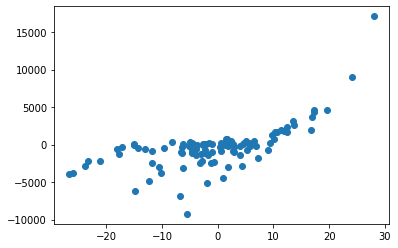

In [5]:
plt.scatter(x,y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42) #data split

In [7]:
MSE_list = []
MSE_pen = []
sens = "1"
for k in range (10): #fit polynomial line with increasing poly degree
  model = np.poly1d(np.polyfit(X_train,y_train,k))
  pred = model(X_train)
  MSE = np.mean(np.subtract(y_train, pred)**2)
  MSE_list.append(MSE) #append MSE
  Mag = Magnitude(MSE)
  sens = int(sens.ljust(Mag-1, '0')) #magnitude of MSE, sensitivity of the parameter which make significative the impact of polynome degree
  MSE_pen.append(MSE + sens*k**2) #MSE with penalising term, degree of polynome multiplied by magnitude MSE
  sens = str(sens)

In [8]:
min_MSE = np.argmin(MSE_list) #degree related to the minimum MSE
min_pen = np.argmin(MSE_pen) #degree related to the minimum penalized MSE
print(min_MSE, min_pen)

9 3


In [9]:
MSE_model = np.poly1d(np.polyfit(X_train,y_train,min_MSE)) #model with degree according to minimum MSE

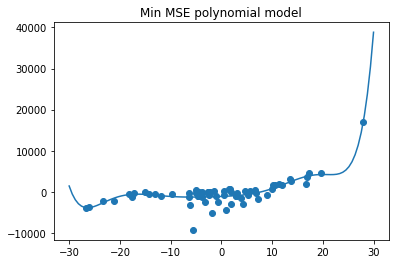

In [13]:
myline = np.linspace(-30, 30, 100)
plt.scatter(X_train,y_train)
plt.plot(myline, MSE_model(myline))
plt.title("Min MSE polynomial model")
plt.show()

In [14]:
pen_model = np.poly1d(np.polyfit(X_train,y_train,min_pen)) #model with degree according to minimum penalized MSE

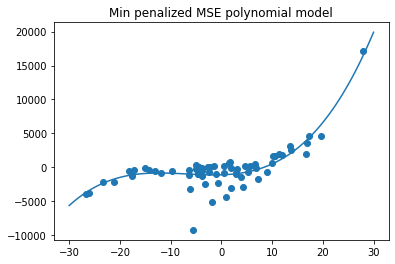

In [17]:
myline = np.linspace(-30, 30, 100)
plt.scatter(X_train,y_train)
plt.plot(myline, pen_model(myline))
plt.title("Min penalized MSE polynomial model")
plt.show()

In [18]:
predict_MSE = MSE_model(X_test)
predict_pen = pen_model(X_test)

MSE_1 = np.mean(np.subtract(y_test, predict_MSE)**2)
MSE_2 = np.mean(np.subtract(y_test, predict_pen)**2)

print(r2_score(y_test, MSE_model(X_test)))
print(r2_score(y_test, pen_model(X_test)))

print(MSE_1, MSE_2)

0.506574731190029
0.5488868411259635
3921116.9587201774 3584874.0820041876


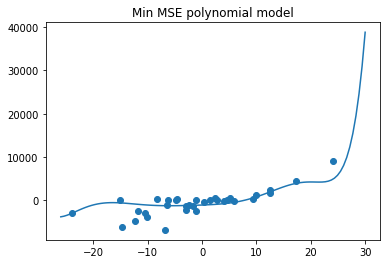

In [20]:
myline = np.linspace(-26, 30, 100)
plt.scatter(X_test, y_test)
plt.plot(myline, MSE_model(myline))
plt.title("Min MSE polynomial model")
plt.show()

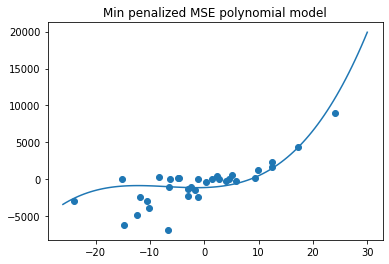

In [21]:
myline = np.linspace(-26, 30, 100)
plt.scatter(X_test, y_test)
plt.plot(myline, pen_model(myline))
plt.title("Min penalized MSE polynomial model")
plt.show()